# Geometric Brownian Motion

## Introduction

Geometric Brownian Motion (GBM) is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion with drift. It is widely used in mathematical finance to model stock prices in the Black-Scholes model.

## Mathematical Foundation

### The Stochastic Differential Equation

A stochastic process $S_t$ follows a Geometric Brownian Motion if it satisfies the following stochastic differential equation (SDE):

$$dS_t = \mu S_t \, dt + \sigma S_t \, dW_t$$

where:
- $S_t$ is the value of the process at time $t$
- $\mu$ is the drift coefficient (expected return rate)
- $\sigma$ is the volatility coefficient (standard deviation of returns)
- $W_t$ is a Wiener process (standard Brownian motion)

### Analytical Solution

Applying Itô's lemma to $\ln(S_t)$, we obtain:

$$d(\ln S_t) = \left(\mu - \frac{\sigma^2}{2}\right) dt + \sigma \, dW_t$$

Integrating from $0$ to $t$:

$$\ln S_t - \ln S_0 = \left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W_t$$

This yields the exact solution:

$$S_t = S_0 \exp\left[\left(\mu - \frac{\sigma^2}{2}\right) t + \sigma W_t\right]$$

### Statistical Properties

For GBM, the expected value and variance are:

$$\mathbb{E}[S_t] = S_0 e^{\mu t}$$

$$\text{Var}(S_t) = S_0^2 e^{2\mu t}\left(e^{\sigma^2 t} - 1\right)$$

The distribution of $S_t$ is log-normal:

$$\ln S_t \sim \mathcal{N}\left(\ln S_0 + \left(\mu - \frac{\sigma^2}{2}\right)t, \sigma^2 t\right)$$

## Numerical Simulation

We will simulate GBM using two approaches:

1. **Exact simulation** using the analytical solution
2. **Euler-Maruyama discretization** of the SDE

### Discretization Schemes

For the exact method, at discrete time steps $t_i = i \Delta t$:

$$S_{t_{i+1}} = S_{t_i} \exp\left[\left(\mu - \frac{\sigma^2}{2}\right) \Delta t + \sigma \sqrt{\Delta t} \, Z_i\right]$$

where $Z_i \sim \mathcal{N}(0, 1)$ are independent standard normal random variables.

For the Euler-Maruyama scheme:

$$S_{t_{i+1}} = S_{t_i} + \mu S_{t_i} \Delta t + \sigma S_{t_i} \sqrt{\Delta t} \, Z_i$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# GBM Parameters
S0 = 100      # Initial price
mu = 0.05     # Drift (5% annual return)
sigma = 0.2   # Volatility (20% annual)
T = 1.0       # Time horizon (1 year)
N = 252       # Number of time steps (trading days)
M = 1000      # Number of simulation paths

dt = T / N    # Time step size
t = np.linspace(0, T, N + 1)

print(f"GBM Parameters:")
print(f"  Initial Value (S₀): {S0}")
print(f"  Drift (μ): {mu}")
print(f"  Volatility (σ): {sigma}")
print(f"  Time Horizon (T): {T} year")
print(f"  Time Steps (N): {N}")
print(f"  Simulation Paths (M): {M}")

GBM Parameters:
  Initial Value (S₀): 100
  Drift (μ): 0.05
  Volatility (σ): 0.2
  Time Horizon (T): 1.0 year
  Time Steps (N): 252
  Simulation Paths (M): 1000


In [2]:
def gbm_exact(S0, mu, sigma, T, N, M):
    """
    Simulate GBM using the exact analytical solution.
    
    Parameters:
    -----------
    S0 : float - Initial value
    mu : float - Drift coefficient
    sigma : float - Volatility coefficient
    T : float - Time horizon
    N : int - Number of time steps
    M : int - Number of paths
    
    Returns:
    --------
    S : ndarray of shape (M, N+1) - Simulated paths
    """
    dt = T / N
    
    # Generate random increments
    Z = np.random.standard_normal((M, N))
    
    # Calculate increments using exact formula
    drift = (mu - 0.5 * sigma**2) * dt
    diffusion = sigma * np.sqrt(dt) * Z
    
    # Cumulative sum to get log-returns
    log_returns = np.cumsum(drift + diffusion, axis=1)
    
    # Initialize paths array
    S = np.zeros((M, N + 1))
    S[:, 0] = S0
    S[:, 1:] = S0 * np.exp(log_returns)
    
    return S

def gbm_euler_maruyama(S0, mu, sigma, T, N, M):
    """
    Simulate GBM using Euler-Maruyama discretization.
    
    Parameters:
    -----------
    S0 : float - Initial value
    mu : float - Drift coefficient
    sigma : float - Volatility coefficient
    T : float - Time horizon
    N : int - Number of time steps
    M : int - Number of paths
    
    Returns:
    --------
    S : ndarray of shape (M, N+1) - Simulated paths
    """
    dt = T / N
    
    # Initialize paths array
    S = np.zeros((M, N + 1))
    S[:, 0] = S0
    
    # Generate random increments
    Z = np.random.standard_normal((M, N))
    
    # Euler-Maruyama iteration
    for i in range(N):
        S[:, i + 1] = S[:, i] * (1 + mu * dt + sigma * np.sqrt(dt) * Z[:, i])
    
    return S

# Run simulations
S_exact = gbm_exact(S0, mu, sigma, T, N, M)
S_euler = gbm_euler_maruyama(S0, mu, sigma, T, N, M)

print(f"Simulation complete.")
print(f"Exact method - Final mean: {S_exact[:, -1].mean():.2f}")
print(f"Euler-Maruyama - Final mean: {S_euler[:, -1].mean():.2f}")
print(f"Theoretical mean: {S0 * np.exp(mu * T):.2f}")

Simulation complete.
Exact method - Final mean: 105.09
Euler-Maruyama - Final mean: 104.31
Theoretical mean: 105.13


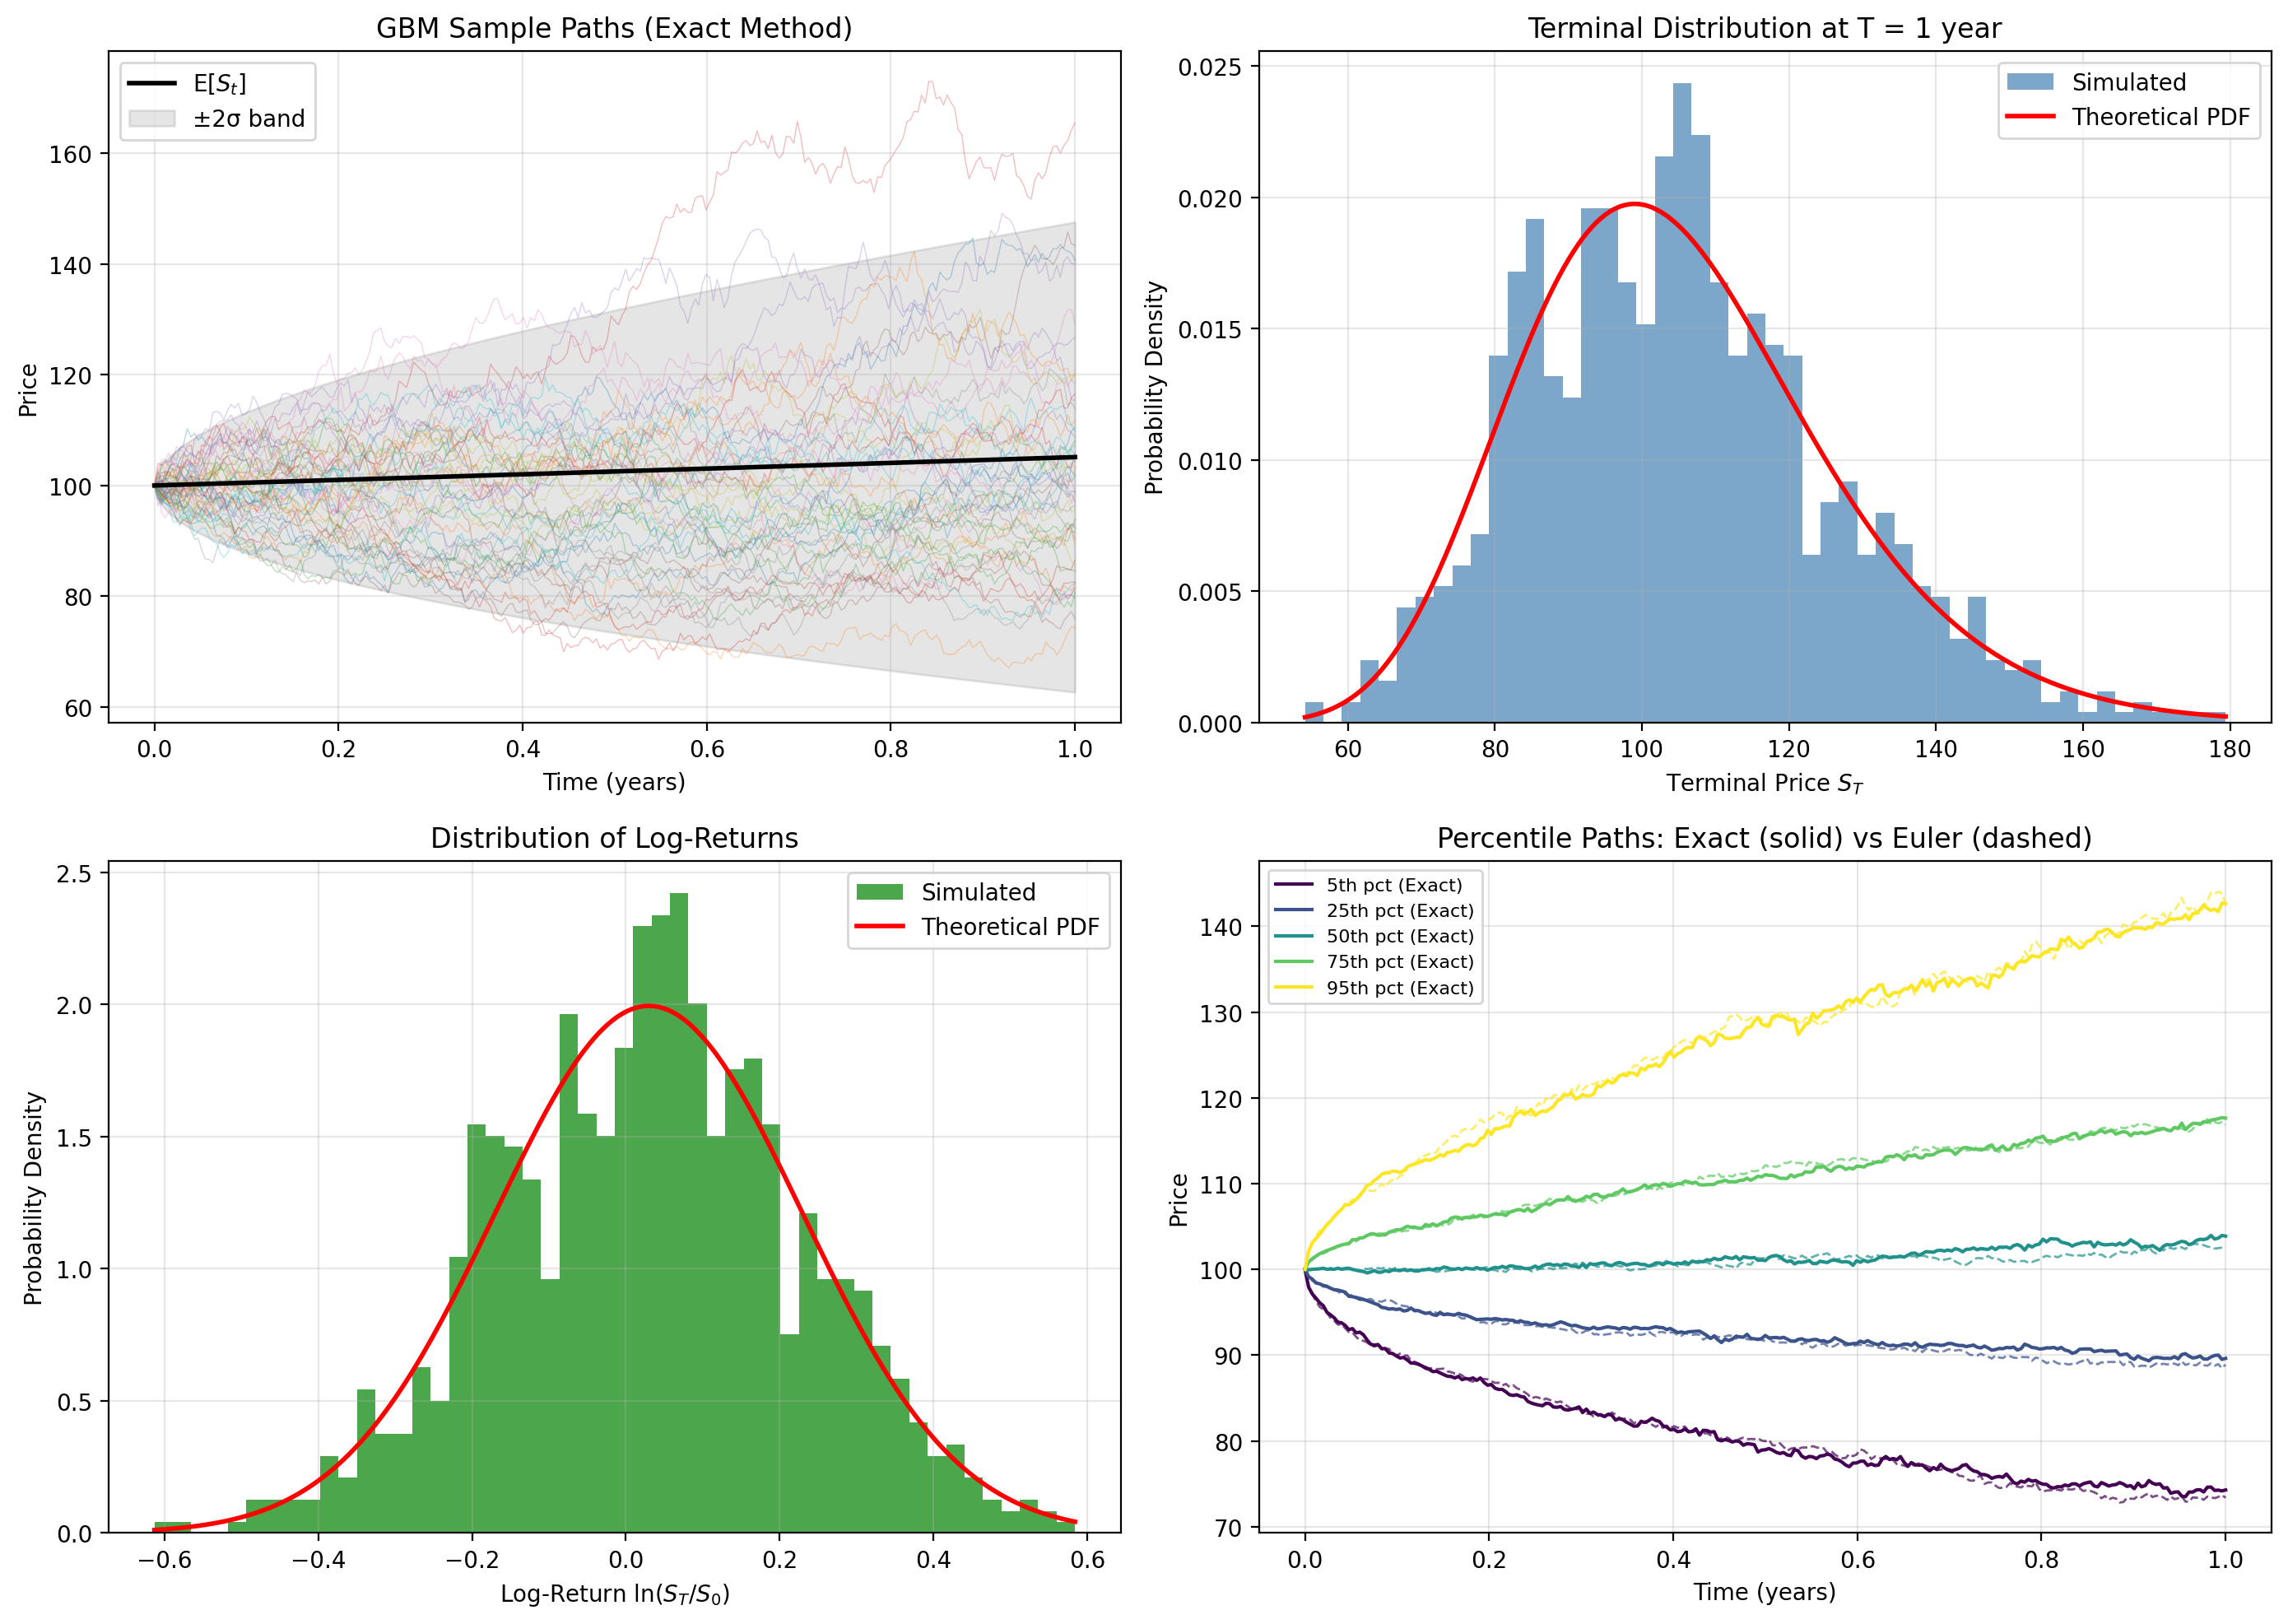


Plot saved to 'plot.png'


In [3]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 10))

# Plot 1: Sample paths
ax1 = fig.add_subplot(2, 2, 1)
num_paths_to_plot = 50
for i in range(num_paths_to_plot):
    ax1.plot(t, S_exact[i, :], alpha=0.3, linewidth=0.5)

# Plot theoretical mean and confidence bands
mean_theoretical = S0 * np.exp(mu * t)
std_theoretical = np.sqrt(S0**2 * np.exp(2 * mu * t) * (np.exp(sigma**2 * t) - 1))

ax1.plot(t, mean_theoretical, 'k-', linewidth=2, label='E[$S_t$]')
ax1.fill_between(t, 
                  mean_theoretical - 2*std_theoretical, 
                  mean_theoretical + 2*std_theoretical, 
                  alpha=0.2, color='gray', label='±2σ band')
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Price')
ax1.set_title('GBM Sample Paths (Exact Method)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Terminal distribution comparison
ax2 = fig.add_subplot(2, 2, 2)

# Histogram of simulated terminal values
ax2.hist(S_exact[:, -1], bins=50, density=True, alpha=0.7, 
         color='steelblue', label='Simulated')

# Theoretical log-normal distribution
mean_log = np.log(S0) + (mu - 0.5 * sigma**2) * T
std_log = sigma * np.sqrt(T)
x = np.linspace(S_exact[:, -1].min(), S_exact[:, -1].max(), 200)
pdf = stats.lognorm.pdf(x, s=std_log, scale=np.exp(mean_log))
ax2.plot(x, pdf, 'r-', linewidth=2, label='Theoretical PDF')

ax2.set_xlabel('Terminal Price $S_T$')
ax2.set_ylabel('Probability Density')
ax2.set_title('Terminal Distribution at T = 1 year')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Log-returns distribution
ax3 = fig.add_subplot(2, 2, 3)

# Calculate log-returns
log_returns_sim = np.log(S_exact[:, -1] / S0)

ax3.hist(log_returns_sim, bins=50, density=True, alpha=0.7, 
         color='green', label='Simulated')

# Theoretical normal distribution for log-returns
mean_ret = (mu - 0.5 * sigma**2) * T
std_ret = sigma * np.sqrt(T)
x_ret = np.linspace(log_returns_sim.min(), log_returns_sim.max(), 200)
pdf_ret = stats.norm.pdf(x_ret, loc=mean_ret, scale=std_ret)
ax3.plot(x_ret, pdf_ret, 'r-', linewidth=2, label='Theoretical PDF')

ax3.set_xlabel('Log-Return $\\ln(S_T/S_0)$')
ax3.set_ylabel('Probability Density')
ax3.set_title('Distribution of Log-Returns')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Comparison of methods
ax4 = fig.add_subplot(2, 2, 4)

# Plot percentiles over time
percentiles = [5, 25, 50, 75, 95]
colors = plt.cm.viridis(np.linspace(0, 1, len(percentiles)))

for pct, color in zip(percentiles, colors):
    exact_pct = np.percentile(S_exact, pct, axis=0)
    euler_pct = np.percentile(S_euler, pct, axis=0)
    ax4.plot(t, exact_pct, '-', color=color, linewidth=1.5, 
             label=f'{pct}th pct (Exact)')
    ax4.plot(t, euler_pct, '--', color=color, linewidth=1, alpha=0.7)

ax4.set_xlabel('Time (years)')
ax4.set_ylabel('Price')
ax4.set_title('Percentile Paths: Exact (solid) vs Euler (dashed)')
ax4.legend(loc='upper left', fontsize=8)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('geometric_brownian_motion_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

In [4]:
# Statistical validation
print("="*60)
print("Statistical Validation of Simulation")
print("="*60)

# Theoretical values
E_ST = S0 * np.exp(mu * T)
Var_ST = S0**2 * np.exp(2 * mu * T) * (np.exp(sigma**2 * T) - 1)
Std_ST = np.sqrt(Var_ST)

# Simulated statistics
sim_mean = S_exact[:, -1].mean()
sim_std = S_exact[:, -1].std()
sim_median = np.median(S_exact[:, -1])

# Theoretical median (log-normal)
theo_median = S0 * np.exp((mu - 0.5 * sigma**2) * T)

print(f"\nTerminal Value Statistics (at T = {T}):")
print(f"{'Metric':<20} {'Theoretical':>15} {'Simulated':>15} {'Error %':>12}")
print("-" * 65)
print(f"{'Mean':<20} {E_ST:>15.4f} {sim_mean:>15.4f} {100*abs(sim_mean-E_ST)/E_ST:>11.4f}%")
print(f"{'Std Dev':<20} {Std_ST:>15.4f} {sim_std:>15.4f} {100*abs(sim_std-Std_ST)/Std_ST:>11.4f}%")
print(f"{'Median':<20} {theo_median:>15.4f} {sim_median:>15.4f} {100*abs(sim_median-theo_median)/theo_median:>11.4f}%")

# Kolmogorov-Smirnov test for log-normality
log_ST = np.log(S_exact[:, -1])
ks_stat, ks_pvalue = stats.kstest(log_ST, 'norm', 
                                   args=(mean_log, std_log))

print(f"\nKolmogorov-Smirnov Test for Log-Normality:")
print(f"  K-S Statistic: {ks_stat:.6f}")
print(f"  p-value: {ks_pvalue:.6f}")
print(f"  Result: {'Fail to reject H₀ (log-normal)' if ks_pvalue > 0.05 else 'Reject H₀'}")

# Comparison of methods
print(f"\nMethod Comparison (Terminal Mean):")
print(f"  Exact Method: {S_exact[:, -1].mean():.4f}")
print(f"  Euler-Maruyama: {S_euler[:, -1].mean():.4f}")
print(f"  Difference: {abs(S_exact[:, -1].mean() - S_euler[:, -1].mean()):.4f}")

Statistical Validation of Simulation

Terminal Value Statistics (at T = 1.0):
Metric                   Theoretical       Simulated      Error %
-----------------------------------------------------------------
Mean                        105.1271        105.0866      0.0385%
Std Dev                      21.2374         20.7688      2.2068%
Median                      103.0455        103.8743      0.8043%

Kolmogorov-Smirnov Test for Log-Normality:
  K-S Statistic: 0.025130
  p-value: 0.544329
  Result: Fail to reject H₀ (log-normal)

Method Comparison (Terminal Mean):
  Exact Method: 105.0866
  Euler-Maruyama: 104.3094
  Difference: 0.7772


## Conclusions

This notebook demonstrated the simulation of Geometric Brownian Motion using both exact and Euler-Maruyama methods. Key observations:

1. **Exact vs. Approximate Methods**: The exact method leverages the closed-form solution and is both computationally efficient and statistically accurate. The Euler-Maruyama method introduces discretization error but converges to the exact solution as $\Delta t \to 0$.

2. **Log-Normal Distribution**: The terminal values $S_T$ follow a log-normal distribution, confirmed by the Kolmogorov-Smirnov test. This is a direct consequence of the additive Gaussian increments in the log-space.

3. **Applications**: GBM is foundational in:
   - Option pricing (Black-Scholes model)
   - Portfolio simulation and risk management
   - Monte Carlo methods in quantitative finance

4. **Limitations**: GBM assumes constant drift and volatility, which may not capture real market phenomena like volatility clustering, jumps, or mean reversion. Extensions include stochastic volatility models (Heston) and jump-diffusion models (Merton).